In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
loan= pd.read_csv('Prosper Loan.csv')

In [120]:
loan

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


Questions:

Univariate Questions:

- What is the distribution of borrower APRs in the dataset?
- How many borrowers are homeowners?
- What is the most common employment status among borrowers?
- What is the average monthly loan payment in the dataset?
- How many loans in the dataset have been defaulted on?

Bivariate Questions:

- Is there a relationship between the borrower's ProsperScore and their ProsperRating?
- Does the borrower's employment status affect their loan status?
- Is there a relationship between BorrowerAPR and LoanStatus?
- Does the loan term impact the borrower's credit utilization?
- Is there a connection between the borrower's income range and the loan amount they requested?



## Deleting Columns
Here i'm going to be using the drop function to delete columns i won't be needing for my analysis and that are not useful.

In [121]:
loan.drop(columns=['CreditGrade', 'ListingKey','ListingCreationDate','DateCreditPulled','TotalProsperLoans','LoanOriginationQuarter','FirstRecordedCreditLine','ListingNumber','ClosedDate','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber','GroupKey','TotalProsperPaymentsBilled','TotalProsperPaymentsBilled','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments'],inplace=True)


In [122]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Term                                113937 non-null  int64  
 1   LoanStatus                          113937 non-null  object 
 2   BorrowerAPR                         113912 non-null  float64
 3   BorrowerRate                        113937 non-null  float64
 4   LenderYield                         113937 non-null  float64
 5   EstimatedEffectiveYield             84853 non-null   float64
 6   EstimatedLoss                       84853 non-null   float64
 7   EstimatedReturn                     84853 non-null   float64
 8   ProsperRating (numeric)             84853 non-null   float64
 9   ProsperRating (Alpha)               84853 non-null   object 
 10  ProsperScore                        84853 non-null   float64
 11  ListingCategory (numeric) 

## Data Type
Converting the Loanoriginationdate column from an object data type to Datetime format

In [163]:
loan['LoanOriginationDate'] = pd.to_datetime(loan['LoanOriginationDate'], format='%d/%m/%Y %H:%M')


## Filling of Empty Cells
I will be using the mean function for the numerical columns and mode function to fill in the empty columns in the categorical columns

In [124]:
numeric_cols = ['BorrowerAPR', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
                'ProsperRating (numeric)', 'ProsperScore', 'EmploymentStatusDuration',
                'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
                'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 
                'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 
                'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 
                'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 
                'AvailableBankcardCredit', 'TotalTrades', 'TradesOpenedLast6Months', 
                'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio']

for col in numeric_cols:
    loan[col].fillna(loan[col].mean(), inplace=True)

categorical_cols = ['ProsperRating (Alpha)', 'BorrowerState', 'Occupation', 'EmploymentStatus']

for col in categorical_cols:
    mode_val = loan[col].mode()[0] 
    loan[col].fillna(mode_val, inplace=True)

In [125]:
loan

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MemberKey,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,36,Completed,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,C,...,19141,9425,2007-09-12,1F3E3376408759268057EDA,330.43,1.0,0,0,0.0,258
1,36,Current,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,A,...,134815,10000,2014-03-03,1D13370546739025387B2F4,318.93,1.0,0,0,0.0,1
2,36,Completed,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,C,...,6466,3001,2007-01-17,5F7033715035555618FA612,123.32,1.0,0,0,0.0,41
3,36,Current,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,A,...,77296,10000,2012-11-01,9ADE356069835475068C6D2,321.45,1.0,0,0,0.0,158
4,36,Current,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.000000,D,...,102670,15000,2013-09-20,36CE356043264555721F06C,563.97,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,Current,0.22354,0.1864,0.1764,0.164900,0.069900,0.095000,4.000000,C,...,88485,10000,2013-04-22,2EC435768441332602FDC15,364.74,1.0,0,0,0.0,1
113933,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,0.100700,0.020000,0.080700,6.000000,A,...,55801,2000,2011-11-07,55C4336679182766893E4FC,65.57,1.0,0,0,0.0,22
113934,60,Current,0.23984,0.2150,0.2050,0.188280,0.102500,0.085780,3.000000,D,...,123122,10000,2013-12-23,0FE0370029359765342FDB5,273.35,1.0,0,0,0.0,119
113935,60,Completed,0.28408,0.2605,0.2505,0.244500,0.085000,0.159500,4.000000,C,...,56401,15000,2011-11-21,A33834861822272782621C8,449.55,1.0,0,0,0.0,274


## Outliers
i used the winsorize function from scipy.stats.mstats to winsorize numerical columns in the dataset. Winsorization is a method used to handle outliers by replacing extreme values with less extreme ones.

In [126]:
from scipy.stats.mstats import winsorize

numeric_cols = ['BorrowerAPR','BankcardUtilization',  'ProsperRating (numeric)', 'ProsperScore', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'MonthlyLoanPayment','IncomeRange','LoanOriginalAmount','Term'] 

for col in numeric_cols:
    loan[col] = winsorize(loan[col].values, limits=[0.05, 0.05])



## NUll Values
I used the isnull function to check for any column that had any null value in it and found none

In [93]:
loan.isnull().sum()

Term                                  0
LoanStatus                            0
BorrowerAPR                           0
BorrowerRate                          0
LenderYield                           0
EstimatedEffectiveYield               0
EstimatedLoss                         0
EstimatedReturn                       0
ProsperRating (numeric)               0
ProsperRating (Alpha)                 0
ProsperScore                          0
ListingCategory (numeric)             0
BorrowerState                         0
Occupation                            0
EmploymentStatus                      0
EmploymentStatusDuration              0
IsBorrowerHomeowner                   0
CurrentlyInGroup                      0
CreditScoreRangeLower                 0
CreditScoreRangeUpper                 0
CurrentCreditLines                    0
OpenCreditLines                       0
TotalCreditLinespast7years            0
OpenRevolvingAccounts                 0
OpenRevolvingMonthlyPayment           0


C:\Users\FOLAKEMI\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


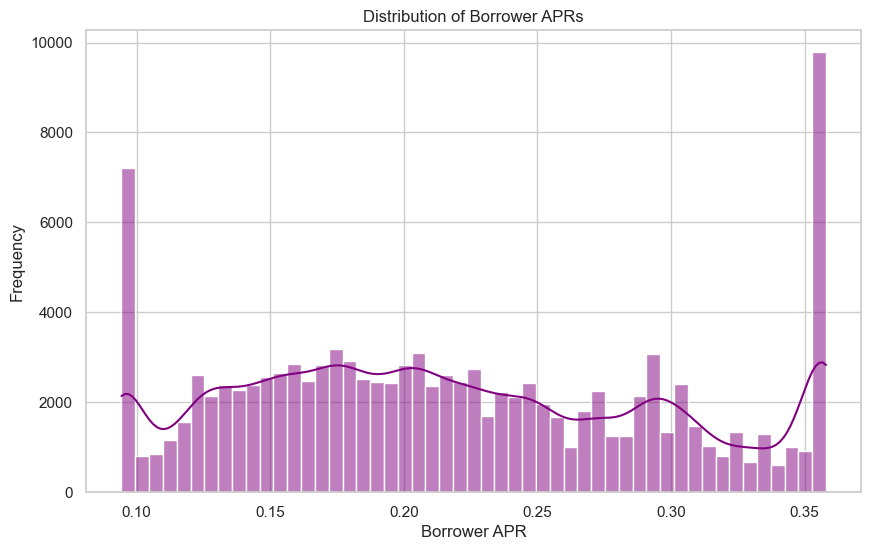

In [133]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=loan, x='BorrowerAPR', kde=True, color='purple')
plt.title('Distribution of Borrower APRs')
plt.xlabel('Borrower APR')
plt.ylabel('Frequency')
plt.show()


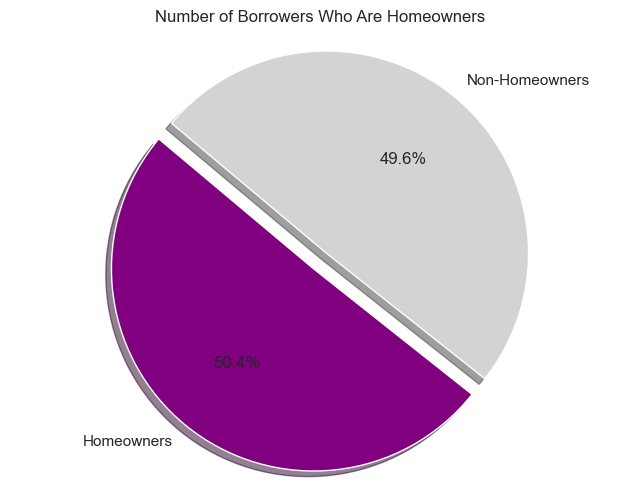

In [190]:
labels = ['Homeowners', 'Non-Homeowners']
sizes = [number_of_homeowners, number_of_non_homeowners]
colors = ['purple', 'lightgrey']
explode = (0.1, 0) 
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Number of Borrowers Who Are Homeowners')
plt.axis('equal') 
number_of_homeowners = (loan['IsBorrowerHomeowner'] == True).sum()
number_of_non_homeowners = (loan['IsBorrowerHomeowner'] == False).sum()



Most Common Employment Status Among Borrowers: Employed


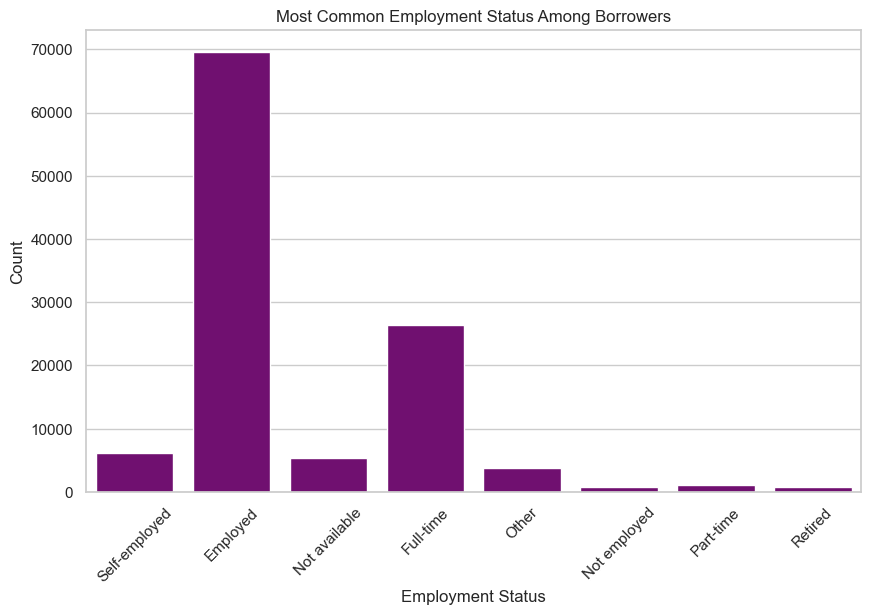

In [143]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=loan, x='EmploymentStatus', color='Purple')
plt.title('Most Common Employment Status Among Borrowers')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  
most_common_employment_status = loan['EmploymentStatus'].mode()[0]
print(f'Most Common Employment Status Among Borrowers: {most_common_employment_status}')


C:\Users\FOLAKEMI\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Average Monthly Loan Payment: $265.10


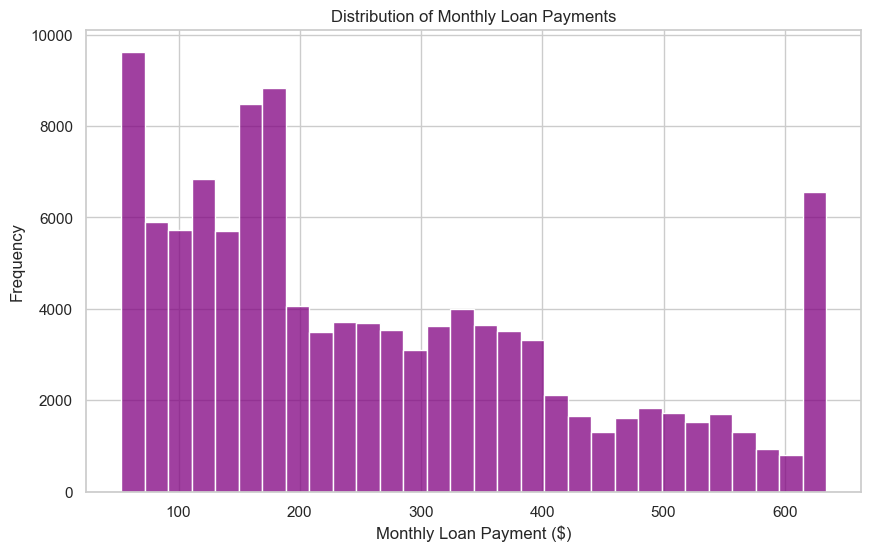

In [145]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=loan, x='MonthlyLoanPayment', bins=30, color='purple')
plt.title('Distribution of Monthly Loan Payments')
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Frequency')
average_monthly_payment = loan['MonthlyLoanPayment'].mean()
print(f'Average Monthly Loan Payment: ${average_monthly_payment:.2f}')


Number of Defaulted Loans: 5018


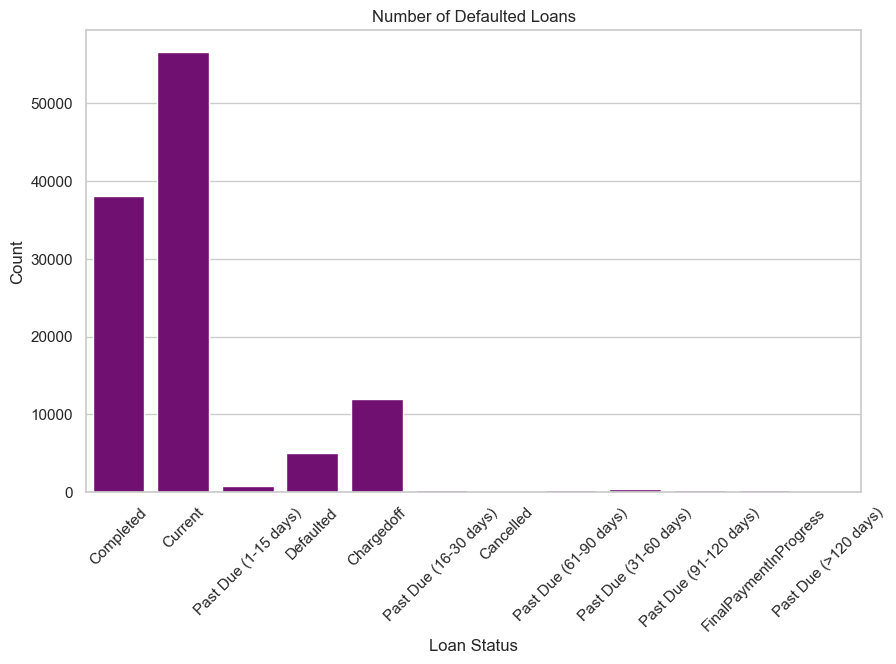

In [147]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=loan, x='LoanStatus', color='purple')
plt.title('Number of Defaulted Loans')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45) 
defaulted_loans = (loan['LoanStatus'] == 'Defaulted').sum()
print(f'Number of Defaulted Loans: {defaulted_loans}')


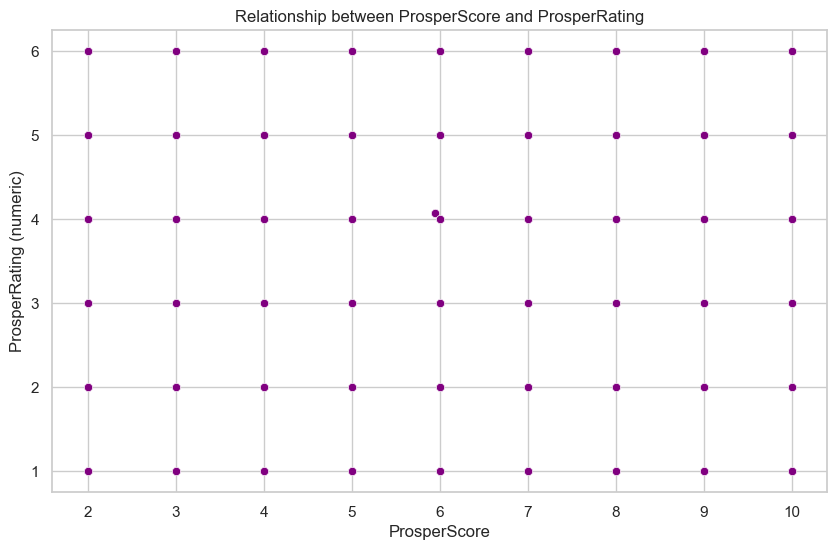

In [182]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan, x='ProsperScore', y='ProsperRating (numeric)', color='purple')
plt.title("Relationship between ProsperScore and ProsperRating")
plt.xlabel("ProsperScore")
plt.ylabel("ProsperRating (numeric)");



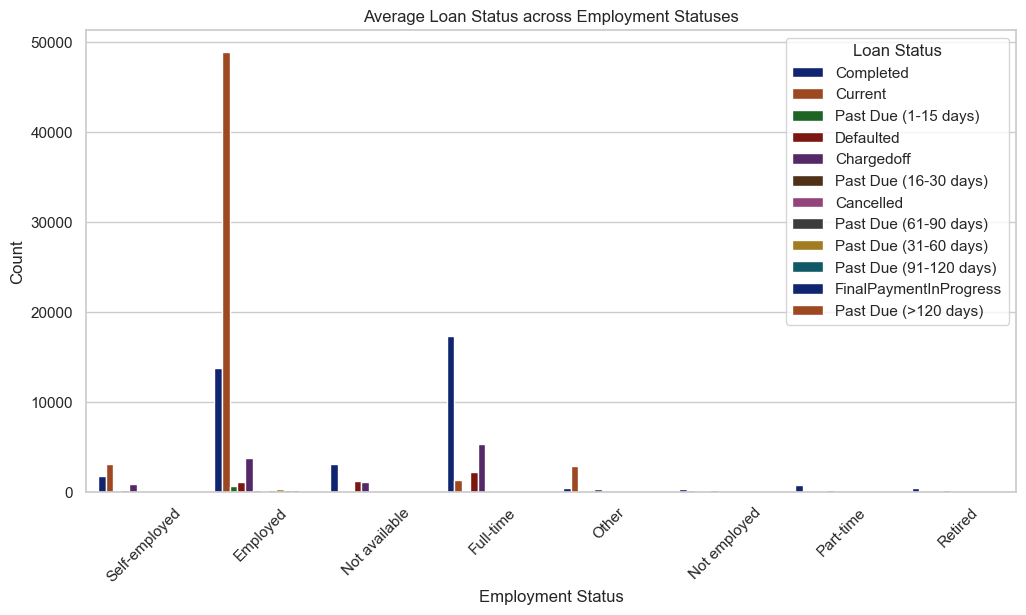

In [161]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=loan, x='EmploymentStatus', hue='LoanStatus', palette='dark')
plt.title("Average Loan Status across Employment Statuses")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Loan Status');

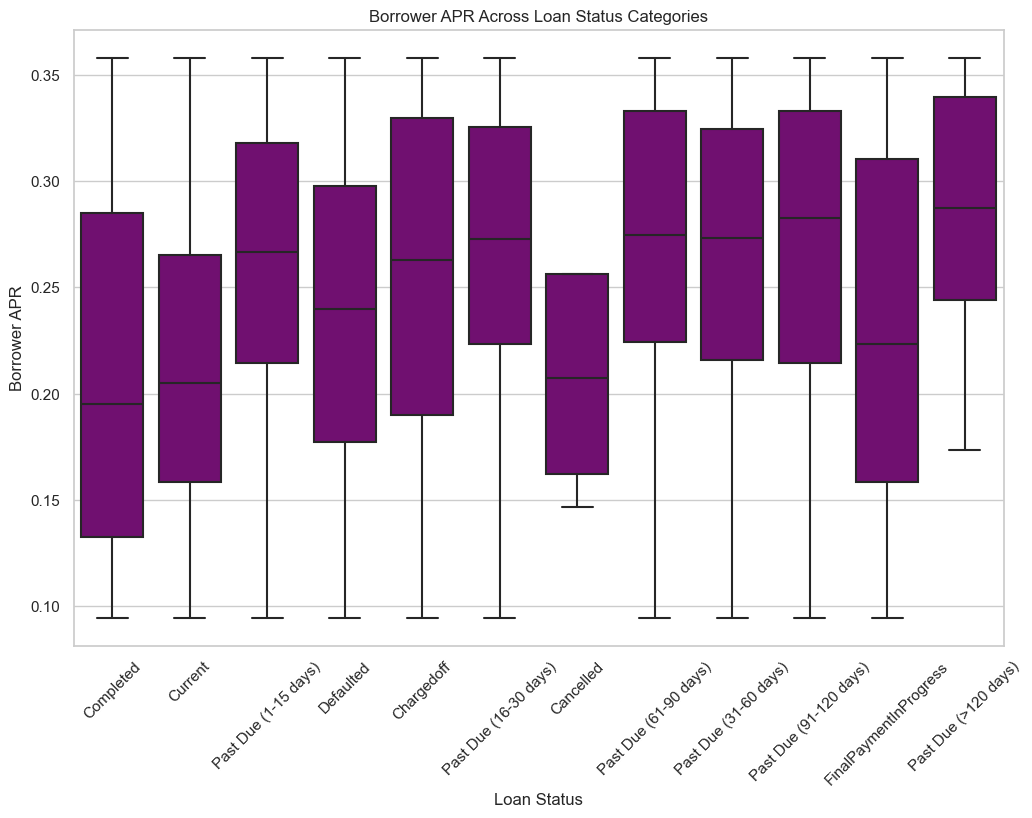

In [196]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=loan, x='LoanStatus', y='BorrowerAPR',color='purple')
plt.title('Borrower APR Across Loan Status Categories')
plt.xlabel('Loan Status')
plt.ylabel('Borrower APR')
plt.xticks(rotation=45);

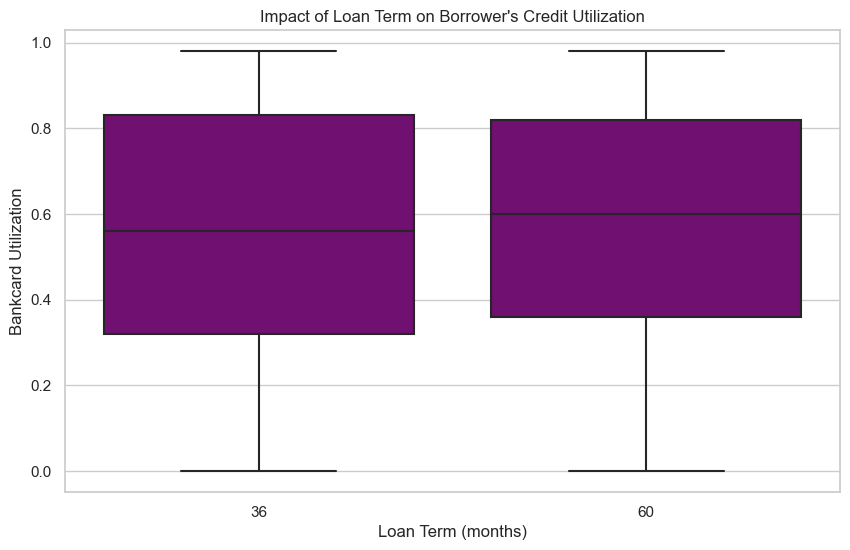

In [193]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan, x='Term', y='BankcardUtilization',color='purple')
plt.title("Impact of Loan Term on Borrower's Credit Utilization")
plt.xlabel("Loan Term (months)")
plt.ylabel("Bankcard Utilization");

                  count          mean          std     min     25%      50%  \
IncomeRange                                                                   
$1-24,999        7895.0   4514.812666  3444.015309  1500.0  2100.0   4000.0   
$100,000+       17337.0  11947.340486  6176.907559  1500.0  6000.0  12000.0   
$25,000-49,999  32192.0   6173.762985  3931.425091  1500.0  3000.0   5000.0   
$50,000-74,999  31050.0   8626.899130  5276.645075  1500.0  4000.0   7500.0   
$75,000-99,999  16916.0  10007.198510  5907.415164  1500.0  4000.0   9700.0   
Not displayed    8547.0   5087.546040  4402.703743  1500.0  2106.5   3200.0   

                    75%      max  
IncomeRange                       
$1-24,999        5000.0  20000.0  
$100,000+       18500.0  20000.0  
$25,000-49,999   9800.0  20000.0  
$50,000-74,999  13500.0  20000.0  
$75,000-99,999  15000.0  20000.0  
Not displayed    6001.0  20000.0  


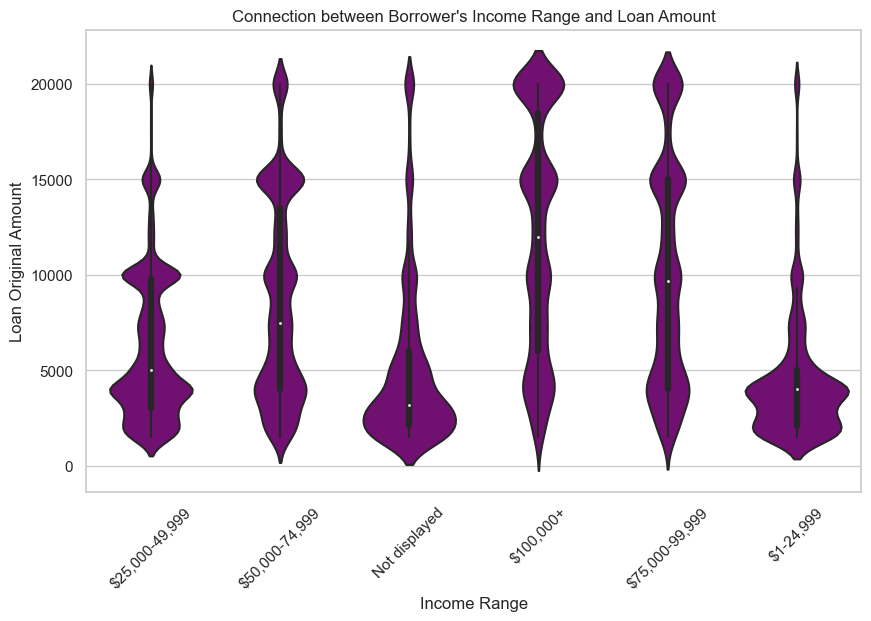

In [192]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=loan, x='IncomeRange', y='LoanOriginalAmount',color='purple')
plt.title("Connection between Borrower's Income Range and Loan Amount")
plt.xlabel("Income Range")
plt.ylabel("Loan Original Amount")
plt.xticks(rotation=45)
summary_stats=loan.groupby('IncomeRange')['LoanOriginalAmount'].describe()
print(summary_stats)